In [269]:
import pandas as pd

In [374]:
df = pd.read_csv('all_data_not_advanced.csv', sep=',')

In [375]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [317]:
pd.set_option('display.max_columns', 200)
#df1 = df.drop(['Name','name','result','index','year_x','year_y','winner'], axis=1)
df1 = df.drop(['name','index','year_x','winner'], axis=1)

In [318]:
pd.set_option('display.max_row', 200)


In [319]:
df1 = df1.drop(['Name','year_y','result'], axis=1)

In [320]:
blah=split_all_data_up (df,df1['point_difference'])
df1['round']=blah
df1=df1[(df1['round']==2)]

In [321]:
df1=df1[(df1['team_seed']== 1) | (df1['team_seed']== 8)]

In [378]:
df1 = df1.drop(['round'], axis = 1)

KeyError: "['round' 'name' 'index' 'year_x' 'winner'] not found in axis"

In [302]:
df1['point_difference'].unique()

array([15,  1,  7,  3,  8,  4,  6, 11,  2,  0,  5, 10,  9, 12])

# Gets the opponent data

In [472]:
#pass through the dataframe you want to add to and the column name
#it will create a new column with the columnname_opponent
def get_opponent_data (df, column_name):
    first_data = []
    second_data = []
    i=0
    x = 0
    for thing in df[f'{column_name}']:
        if i ==0:
            first_data.append(df[f'{column_name}'].iloc[x+1])
            i+=1
            x+=1
        elif i==1:
            second_data.append(df[f'{column_name}'].iloc[x-1])
            i=0
            x+=1
    
    i=0
    x=0
    opponent_data = []
    for thing in first_data+second_data:
        if i==0:
            opponent_data.append(first_data[x])
            i+=1
        elif i==1:
            opponent_data.append(second_data[x])
            x+=1
            i=0
    print('made it here')        
    df[f'{column_name}'+'_opponent']=opponent_data


In [470]:
get_opponent_data (df1, 'PTS')

made it here


In [475]:
opponent_columns = ['BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed', 'round']

In [476]:
for column in opponent_columns:
    get_opponent_data (df1, f'{column}')

made it here
made it here
made it here
made it here
made it here
made it here
made it here
made it here
made it here
made it here
made it here
made it here
made it here
made it here
made it here
made it here
made it here


In [477]:
df1

,point_difference,team_seed,win,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,round,PTS_opponent,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent,round_opponent
0,15,1,1,1,4.26,6.15,15.1,1.12,6.2,18.0,548.0,1139.0,0.481,75.8,0.441,0.345,0.776,12.1,26.9,39.0,16,1,68.0,2.29,5.39,12.2,0.87,5.7,17.0,556.0,1130.0,0.492,0.447,0.339,0.735,8.8,25.6,34.3,1,1
1,15,16,0,0,2.29,5.39,12.2,0.87,5.7,17.0,556.0,1130.0,0.492,68.0,0.447,0.339,0.735,8.8,25.6,34.3,1,1,75.8,4.26,6.15,15.1,1.12,6.2,18.0,548.0,1139.0,0.481,0.441,0.345,0.776,12.1,26.9,39.0,16,1
2,1,8,1,1,2.96,8.00,14.0,1.07,6.7,21.0,481.0,1055.0,0.456,69.5,0.409,0.320,0.682,9.7,28.2,37.9,9,1,70.6,3.00,5.89,15.0,1.55,9.8,28.0,420.0,863.0,0.487,0.425,0.354,0.709,8.0,27.0,35.0,8,1
3,1,9,0,0,3.00,5.89,15.0,1.55,9.8,28.0,420.0,863.0,0.487,70.6,0.425,0.354,0.709,8.0,27.0,35.0,8,1,69.5,2.96,8.00,14.0,1.07,6.7,21.0,481.0,1055.0,0.456,0.409,0.320,0.682,9.7,28.2,37.9,9,1
4,7,5,1,1,3.19,5.85,16.0,1.19,8.3,25.0,471.0,857.0,0.550,75.0,0.459,0.337,0.769,11.7,25.3,37.0,12,1,64.6,2.96,7.07,10.1,0.84,5.6,20.0,509.0,1117.0,0.456,0.400,0.286,0.687,11.7,27.6,39.3,5,1
5,7,12,0,0,2.96,7.07,10.1,0.84,5.6,20.0,509.0,1117.0,0.456,64.6,0.400,0.286,0.687,11.7,27.6,39.3,5,1,75.0,3.19,5.85,16.0,1.19,8.3,25.0,471.0,857.0,0.550,0.459,0.337,0.769,11.7,25.3,37.0,12,1
6,9,4,1,1,1.66,7.76,14.5,1.12,5.9,16.0,561.0,997.0,0.563,68.8,0.501,0.368,0.657,6.0,23.8,29.8,13,1,69.4,3.74,7.17,13.2,0.94,8.0,24.0,364.0,712.0,0.511,0.432,0.331,0.760,8.3,24.9,33.2,4,1
7,9,13,0,0,3.74,7.17,13.2,0.94,8.0,24.0,364.0,712.0,0.511,69.4,0.432,0.331,0.760,8.3,24.9,33.2,4,1,68.8,1.66,7.76,14.5,1.12,5.9,16.0,561.0,997.0,0.563,0.501,0.368,0.657,6.0,23.8,29.8,13,1
8,5,6,1,1,3.48,7.48,13.6,0.90,7.0,23.0,544.0,1005.0,0.541,75.6,0.448,0.301,0.698,12.0,26.1,38.1,11,1,72.2,3.70,7.22,14.2,1.11,7.6,24.0,466.0,1021.0,0.456,0.404,0.321,0.696,12.3,27.1,39.4,6,1
9,5,11,0,0,3.70,7.22,14.2,1.11,7.6,24.0,466.0,1021.0,0.456,72.2,0.404,0.321,0.696,12.3,27.1,39.4,6,1,75.6,3.48,7.48,13.6,0.90,7.0,23.0,544.0,1005.0,0.541,0.448,0.301,0.698,12.0,26.1,38.1,11,1


In [484]:
def subtracted_stats  (df,column):
    i = 0
    subtracted = []
    for thing in list(df[f'{column}']):
        difference=list(df[f'{column}'])[i]-list(df[f'{column}'+'_opponent'])[i]
        subtracted.append(difference)
        i+=1
    
    df[f'{column}'+'_subtracted']=subtracted

In [483]:
columns = ['BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG']

In [485]:
for thing in columns:
    subtracted_stats(df1,thing)

In [487]:
df1.columns

Index(['point_difference', 'team_seed', 'win', 'higher_or_lower_seed', 'BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed', 'round', 'PTS_opponent', 'BLKPG_opponent',
       'STPG_opponent', 'APG_opponent', 'AST_TO_opponent', '_3pm_opponent',
       '_3pa_opponent', '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STPG_subtracted',
       'APG_subtracted', 'AST_TO_subtracted', '_3pm_subtracted',
       '_3pa_subtracted', '_2pm_subtracted', '_2pa_subtracted',
       '_2p_perc_subtracted', 'PTS_subtracted', 'FG_perc_subtracted',
       '_3p_perc_subtracted', 'FT_perc_subtracted', 'ORPG_subtracted',
       'DRPG_subtracted', 'RPG_subtracted'],
      dtype='object')

# Decision Tree

In [556]:
X = df1.drop('win',axis=1)
#could have also done answers1.set_index('SEQN') instead of dropping
y = df1['win']

In [557]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [558]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 123)


In [559]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [560]:
predictions = dtree.predict(X_test)


In [561]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.62      0.67      0.64       625
           1       0.67      0.62      0.64       685
        9999       1.00      1.00      1.00        13

    accuracy                           0.65      1323
   macro avg       0.76      0.76      0.76      1323
weighted avg       0.65      0.65      0.65      1323



In [562]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions)


0.6455026455026455

In [495]:

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train.columns)
len(features)

54

In [496]:
df1.columns

Index(['point_difference', 'team_seed', 'win', 'higher_or_lower_seed', 'BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed', 'round', 'PTS_opponent', 'BLKPG_opponent',
       'STPG_opponent', 'APG_opponent', 'AST_TO_opponent', '_3pm_opponent',
       '_3pa_opponent', '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STPG_subtracted',
       'APG_subtracted', 'AST_TO_subtracted', '_3pm_subtracted',
       '_3pa_subtracted', '_2pm_subtracted', '_2pa_subtracted',
       '_2p_perc_subtracted', 'PTS_subtracted', 'FG_perc_subtracted',
       '_3p_perc_subtracted', 'FT_perc_subtracted', 'ORPG_subtracted',
       'DRPG_subtracted', 'RPG_subtracted'],
      dtype='object')

In [505]:
#function for accuracy in decision tree
def get_predictions (df1,point_diff):
    #df = pd.read_csv('all_data_not_advanced.csv', sep=',')
    #df.drop(['Unnamed: 0'], axis=1, inplace = True)
    #pd.set_option('display.max_columns', 200)
    #df1 = df.drop(['Name','name','result','index','year_x','year_y','winner'], axis=1)
    #df1 = df.drop(['name','index','year_x','winner'], axis=1)
    #pd.set_option('display.max_row', 200)
    #df1 = df1.drop(['Name','year_y','result'], axis=1)
    #blah=split_all_data_up (df,df1['point_difference'])
    #df1['round']=blah
    #unhashtag this if you want the ESPN stuff also
    #df1=df1[['point_difference','team_seed','win','higher_or_lower_seed','other_team_seed','round']]
    #unhashtag the row below if you want to look at a specific round
    df1=df1[(df1['round']==1)]
    df1=df1[(df1['point_difference']== point_diff)]
    df1 = df1.drop(['round'], axis = 1)
    X = df1.drop('win',axis=1)
    #could have also done answers1.set_index('SEQN') instead of dropping
    y = df1['win']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_test)
    #print(classification_report(y_test,predictions))

    return metrics.accuracy_score(y_test, predictions)


In [500]:
possible_point_differences

[15, 1, 7, 3, 8, 4, 6, 11, 2, 0, 5, 10, 9, 12]

In [508]:
predictions = {}
for num in possible_point_differences:
    try:
        predictions[f'{num}']=get_predictions (df1,num)
    except:
        continue

In [509]:
predictions

{'15': 0.9761904761904762,
 '1': 0.44047619047619047,
 '7': 0.4642857142857143,
 '3': 0.5714285714285714,
 '11': 0.7380952380952381,
 '5': 0.47619047619047616,
 '9': 0.6071428571428571}

In [429]:
fourth_round_pred_no_stats = predictions

In [436]:
#with stats
predictions

{'15': 0.9761904761904762,
 '1': 0.5067873303167421,
 '7': 0.5294117647058824,
 '3': 0.536723163841808,
 '8': 0.6326530612244898,
 '4': 0.4788732394366197,
 '6': 0.6363636363636364,
 '11': 0.7604166666666666,
 '2': 0.5806451612903226,
 '0': 1.0,
 '5': 0.54421768707483,
 '10': 0.6,
 '9': 0.6428571428571429,
 '12': 1.0}

In [433]:
#no stats
predictions

{'15': 1.0,
 '1': 0.5158371040723982,
 '7': 0.7058823529411765,
 '3': 0.655367231638418,
 '8': 0.7551020408163265,
 '4': 0.7183098591549296,
 '6': 0.5454545454545454,
 '11': 0.84375,
 '2': 0.5806451612903226,
 '0': 1.0,
 '5': 0.6462585034013606,
 '10': 0.4,
 '9': 0.7448979591836735,
 '12': 1.0}

In [414]:
All_pred_no_stats

{'15': 1.0,
 '1': 0.5203619909502263,
 '7': 0.6838235294117647,
 '3': 0.6214689265536724,
 '8': 0.7619047619047619,
 '4': 0.7323943661971831,
 '6': 0.7272727272727273,
 '11': 0.8541666666666666,
 '2': 0.45161290322580644,
 '0': 1.0,
 '5': 0.673469387755102,
 '10': 0.2,
 '9': 0.7857142857142857,
 '12': 1.0}

In [418]:
first_round_pred_no_stats

{'15': 0.9880952380952381,
 '1': 0.42857142857142855,
 '7': 0.5833333333333334,
 '3': 0.5476190476190477,
 '11': 0.8690476190476191,
 '5': 0.6428571428571429,
 '9': 0.7142857142857143}

In [366]:
first_round_pred = predictions

In [367]:
first_round_pred

{'15': 0.9880952380952381,
 '1': 0.5238095238095238,
 '7': 0.6785714285714286,
 '3': 0.44047619047619047,
 '11': 0.6904761904761905,
 '5': 0.5119047619047619,
 '9': 0.6309523809523809}

In [422]:
second_round_pred_no_stats

{'1': 0.5294117647058824,
 '7': 0.8095238095238095,
 '3': 0.7021276595744681,
 '8': 0.7602739726027398,
 '5': 0.6792452830188679}

In [359]:
second_round_pred

{'1': 0.5686274509803921,
 '7': 0.6190476190476191,
 '3': 0.574468085106383,
 '8': 0.589041095890411,
 '5': 0.5849056603773585}

In [426]:
third_round_pred_no_stats

{'1': 0.5757575757575758,
 '7': 0.5555555555555556,
 '3': 0.7352941176470589,
 '4': 0.6716417910447762,
 '11': 1.0,
 '5': 0.6666666666666666,
 '9': 0.7777777777777778,
 '12': 1.0}

In [360]:
third_round_pred

{'1': 0.45454545454545453,
 '7': 0.4444444444444444,
 '3': 0.5588235294117647,
 '4': 0.5223880597014925,
 '11': 1.0,
 '5': 0.3333333333333333,
 '9': 0.6666666666666666,
 '12': 1.0}

In [430]:
fourth_round_pred_no_stats

{'1': 0.3939393939393939,
 '7': 0.0,
 '3': 0.5,
 '6': 0.875,
 '2': 0.4583333333333333,
 '5': 0.8571428571428571,
 '10': 0.4,
 '9': 1.0}

In [361]:
fourth_round_pred

{'1': 0.45454545454545453,
 '7': 0.0,
 '3': 0.5,
 '6': 1.0,
 '2': 0.2916666666666667,
 '5': 0.5714285714285714,
 '10': 0.2,
 '9': 0.3333333333333333}

In [362]:
fifth_round_pred

{'1': 0.5833333333333334,
 '7': 0.0,
 '3': 0.6666666666666666,
 '8': 1.0,
 '4': 0.3333333333333333,
 '6': 0.3333333333333333,
 '2': 0.6666666666666666,
 '0': 1.0,
 '9': 0.5}

In [363]:
sixth_round_pred

{'1': 0.4444444444444444,
 '7': 0.0,
 '3': 0.0,
 '4': 1.0,
 '2': 0.5,
 '0': 1.0,
 '5': 0.5}

In [308]:
All_rounds_predictions

{'15': 1.0,
 '1': 0.5067873303167421,
 '7': 0.5882352941176471,
 '3': 0.5141242937853108,
 '8': 0.6394557823129252,
 '4': 0.5915492957746479,
 '6': 0.6363636363636364,
 '11': 0.7916666666666666,
 '2': 0.3870967741935484,
 '0': 1.0,
 '5': 0.5238095238095238,
 '10': 0.8,
 '9': 0.7142857142857143,
 '12': 1.0}

In [337]:
possible_point_differences=[15,  1,  7,  3,  8,  4,  6, 11,  2,  0,  5, 10,  9, 12]

In [510]:
import seaborn as sns

In [517]:
x = [1,2,3,4]
y = [1,2,3,4]
z = [2,3,4,5]

Text(0.5, 1.0, 'add title here')

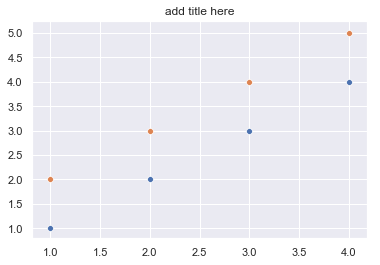

In [523]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x, y)
ax = sns.scatterplot(x, z)
ax.set_title('lalala')

In [519]:
df1.columns

Index(['point_difference', 'team_seed', 'win', 'higher_or_lower_seed', 'BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed', 'round', 'PTS_opponent', 'BLKPG_opponent',
       'STPG_opponent', 'APG_opponent', 'AST_TO_opponent', '_3pm_opponent',
       '_3pa_opponent', '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STPG_subtracted',
       'APG_subtracted', 'AST_TO_subtracted', '_3pm_subtracted',
       '_3pa_subtracted', '_2pm_subtracted', '_2pa_subtracted',
       '_2p_perc_subtracted', 'PTS_subtracted', 'FG_perc_subtracted',
       '_3p_perc_subtracted', 'FT_perc_subtracted', 'ORPG_subtracted',
       'DRPG_subtracted', 'RPG_subtracted'],
      dtype='object')

In [550]:
def make_graph (df1,column):
    wins=df1[(df1['win']==1)]
    losses=df1[(df1['win']==0)]
    
    wins = wins.sort_values(by =f'{column}' )
    losses = losses.sort_values(by =f'{column}' )
    
    wins = wins.sort_values(by =f'{column}')
    wins = wins.sort_values(by =f'{column}')
    
    i=0
    index_=[]
    for thing in wins[f'{column}']:
        index_.append(i)
        i+=1
    wins['index_']=index_
    
    i=0
    index_1=[]
    for thing in losses[f'{column}']:
        index_1.append(i)
        i+=1
    losses['index_']=index_1
        
    

    ax = sns.scatterplot(list(wins['index_']),list(wins[f'{column}']))
    ax = sns.scatterplot(list(losses['index_']),list(losses[f'{column}']))
    ax.set_title(f'{column}')
    return ax



    

In [554]:
def make_graph (df1,column):
    wins=df1[(df1['win']==1)]
    losses=df1[(df1['win']==0)]
    
    wins = wins.sort_values(by =f'{column}' )
    losses = losses.sort_values(by =f'{column}' )
    
    wins = wins.sort_values(by =f'{column}')
    wins = wins.sort_values(by =f'{column}')
    
    i=0
    index_=[]
    for thing in wins[f'{column}']:
        index_.append(i)
        i+=1
    wins['index_']=index_
    
    i=0
    index_1=[]
    for thing in losses[f'{column}']:
        index_1.append(i)
        i+=1
    losses['index_']=index_1
        
    

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(list(wins['index_']),list(wins[f'{column}']), s=10, c='b', marker="s", label='first')
    ax1.scatter(list(losses['index_']),list(losses[f'{column}']), s=10, c='r', marker="o", label='second')
    plt.title(f'{column}')
    plt.legend(loc=f'{column}');
    plt.show()

In [545]:
columns = ['point_difference', 'team_seed', 'higher_or_lower_seed', 'BLKPG',
       'STPG', 'APG', 'AST_TO', '_3pm', '_3pa', '_2pm', '_2pa', '_2p_perc',
       'PTS', 'FG_perc', '_3p_perc', 'FT_perc', 'ORPG', 'DRPG', 'RPG',
       'other_team_seed','PTS_opponent', 'BLKPG_opponent',
       'STPG_opponent', 'APG_opponent', 'AST_TO_opponent', '_3pm_opponent',
       '_3pa_opponent', '_2pm_opponent', '_2pa_opponent', '_2p_perc_opponent',
       'FG_perc_opponent', '_3p_perc_opponent', 'FT_perc_opponent',
       'ORPG_opponent', 'DRPG_opponent', 'RPG_opponent',
       'other_team_seed_opponent', 'BLKPG_subtracted', 'STPG_subtracted',
       'APG_subtracted', 'AST_TO_subtracted', '_3pm_subtracted',
       '_3pa_subtracted', '_2pm_subtracted', '_2pa_subtracted',
       '_2p_perc_subtracted', 'PTS_subtracted', 'FG_perc_subtracted',
       '_3p_perc_subtracted', 'FT_perc_subtracted', 'ORPG_subtracted',
       'DRPG_subtracted', 'RPG_subtracted']

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "point_difference". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


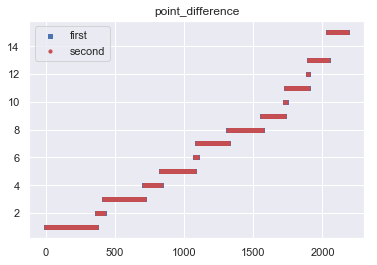

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "team_seed". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


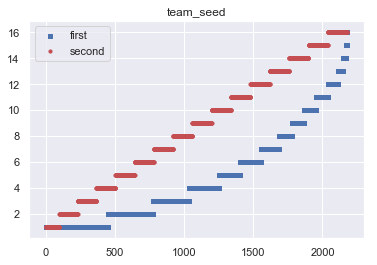

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "higher_or_lower_seed". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


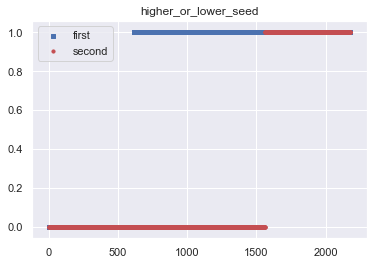

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "BLKPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


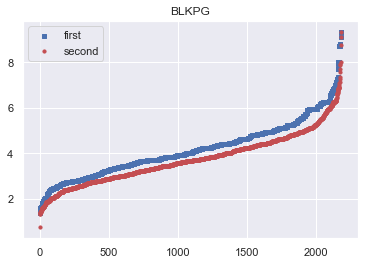

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "STPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


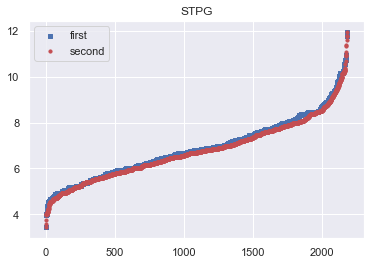

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "APG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


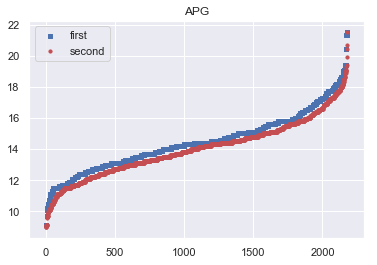

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "AST_TO". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


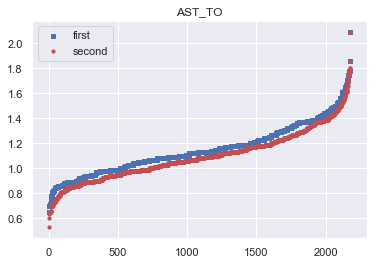

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pm". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


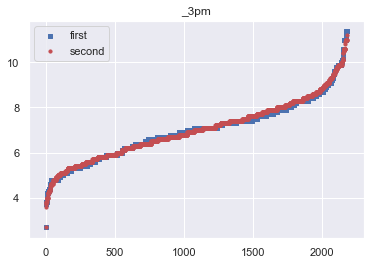

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pa". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


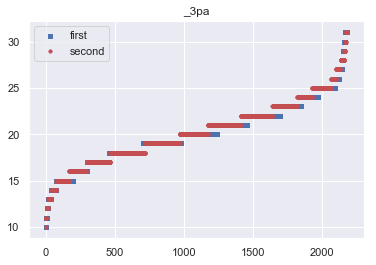

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pm". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


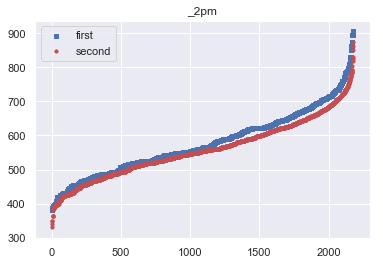

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pa". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


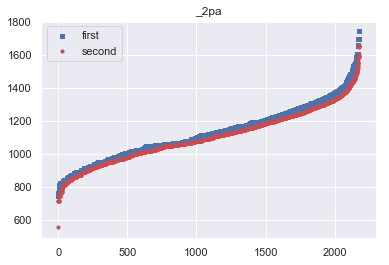

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2p_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


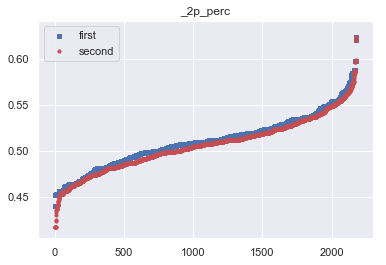

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "PTS". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


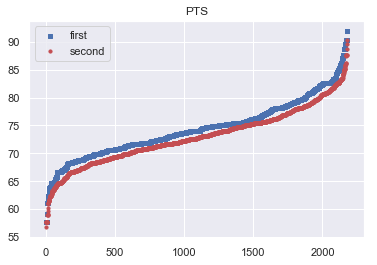

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FG_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


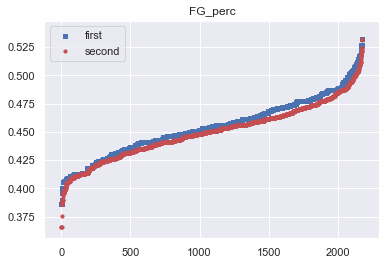

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3p_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


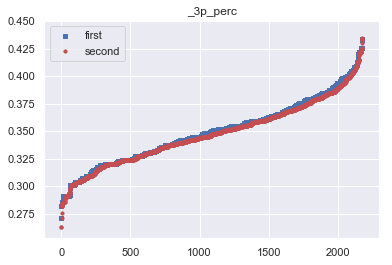

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FT_perc". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


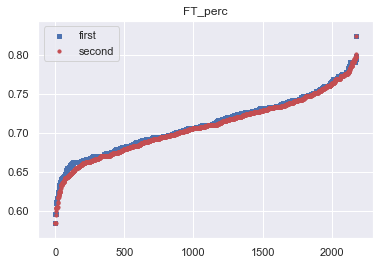

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "ORPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


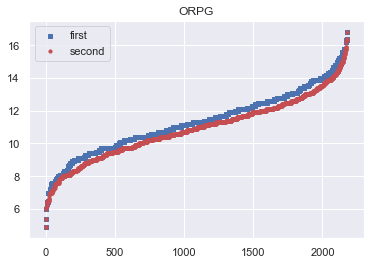

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "DRPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


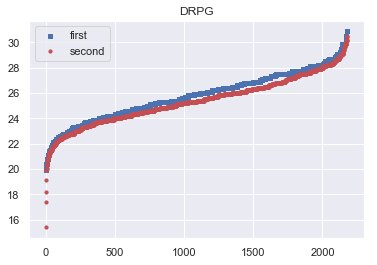

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "RPG". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


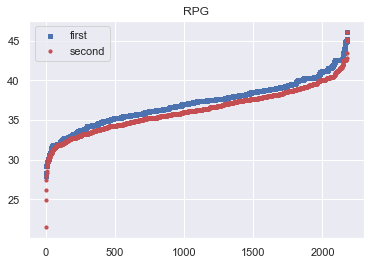

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "other_team_seed". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


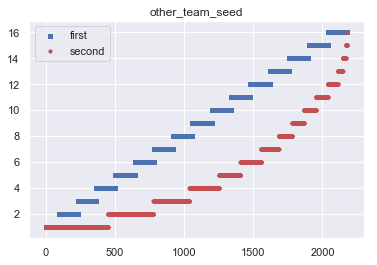

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "PTS_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


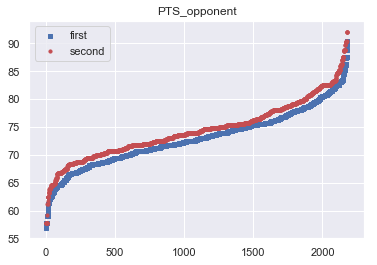

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "BLKPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


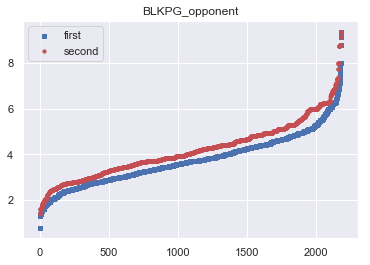

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "STPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


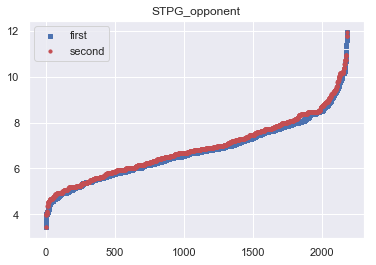

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "APG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


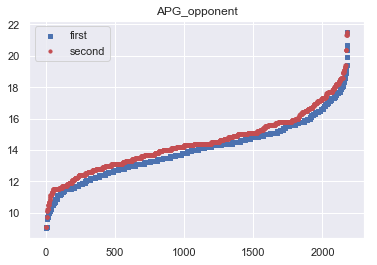

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "AST_TO_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


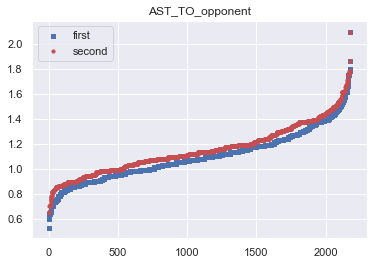

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pm_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


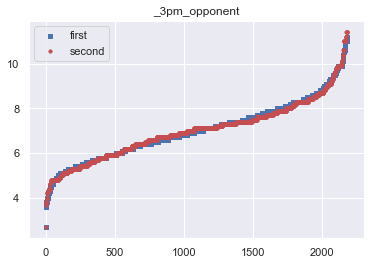

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pa_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


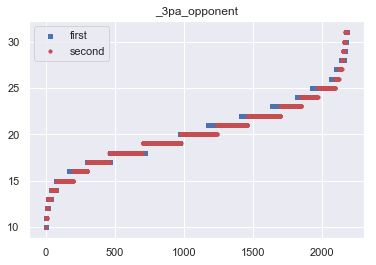

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pm_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


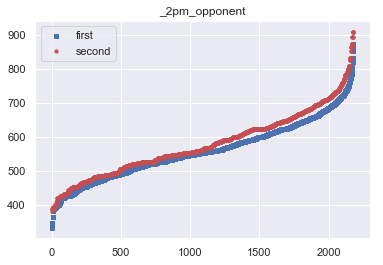

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pa_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


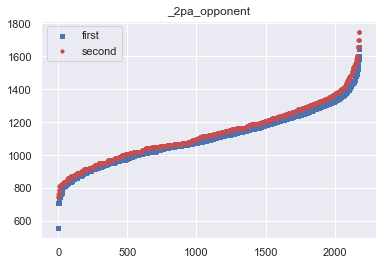

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2p_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


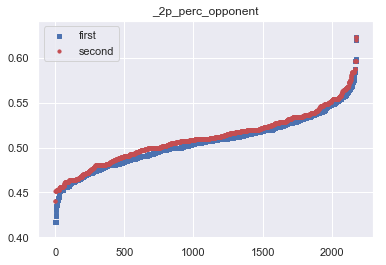

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FG_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


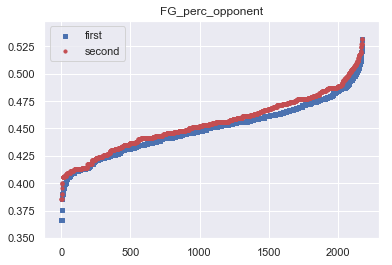

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3p_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


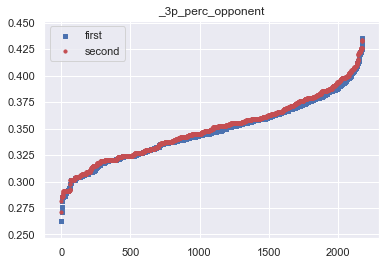

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FT_perc_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


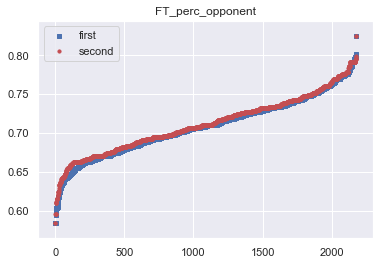

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "ORPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


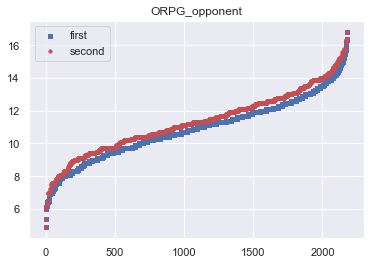

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "DRPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


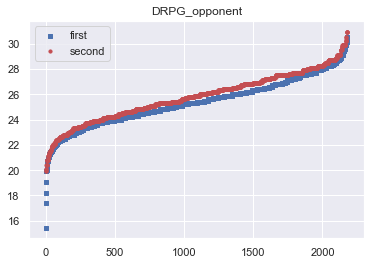

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "RPG_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


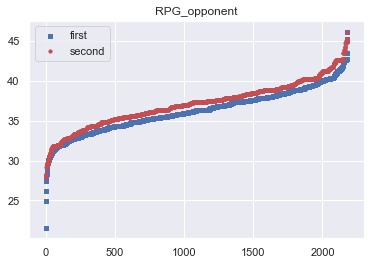

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "other_team_seed_opponent". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


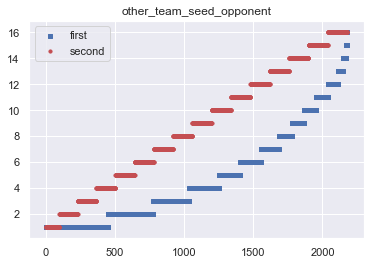

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "BLKPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


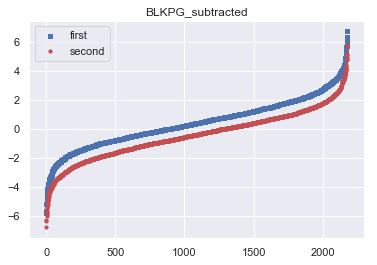

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "STPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


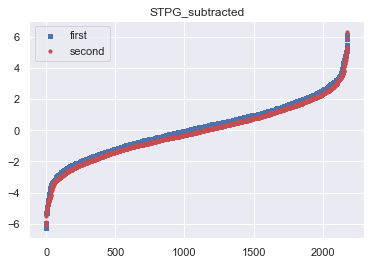

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "APG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


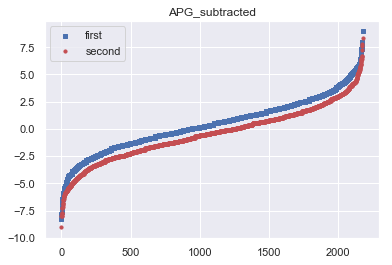

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "AST_TO_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


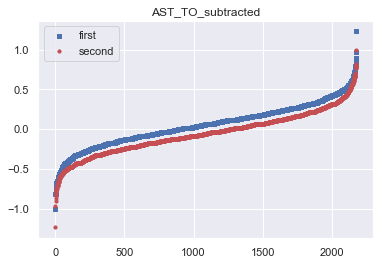

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pm_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


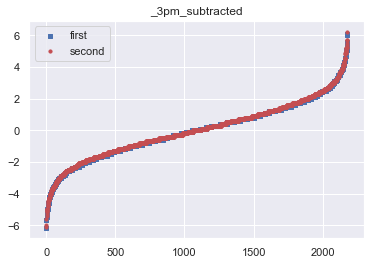

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3pa_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


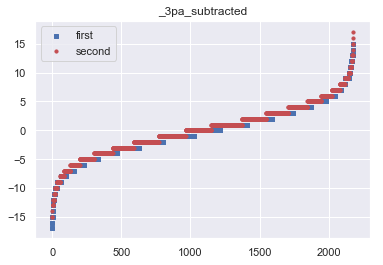

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pm_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


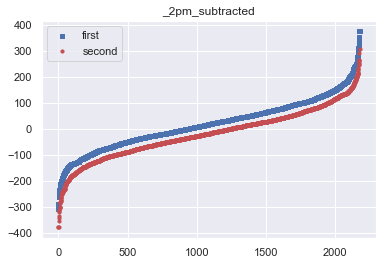

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2pa_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


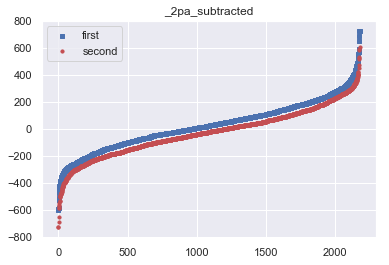

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_2p_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


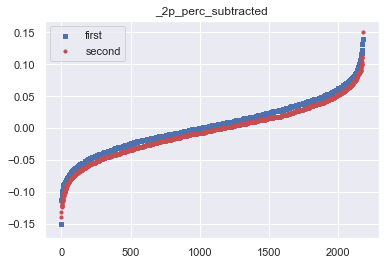

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "PTS_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


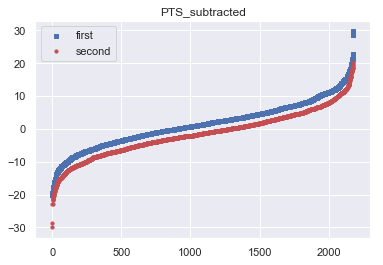

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FG_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


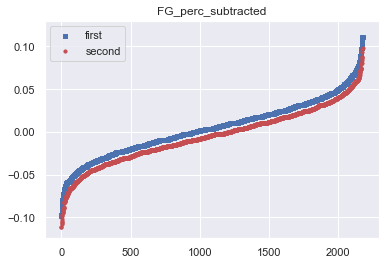

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "_3p_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


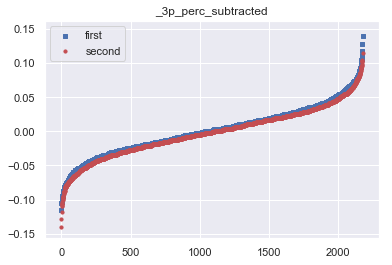

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "FT_perc_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


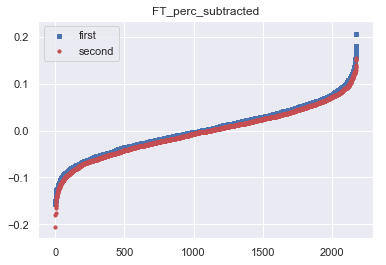

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "ORPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


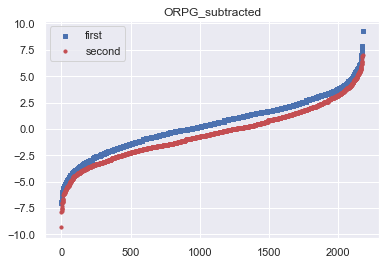

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "DRPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


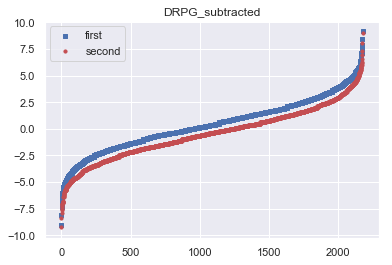

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "RPG_subtracted". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


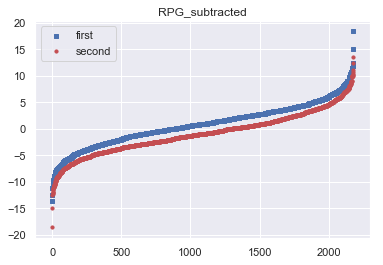

In [555]:
for column in columns:
    make_graph (df1,column)

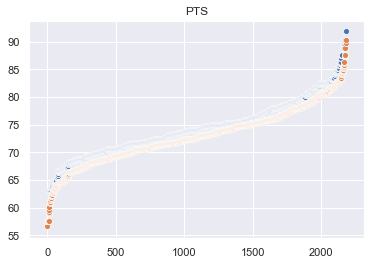

In [543]:
make_graph (df1,'PTS')

Text(0.5, 1.0, 'PTS')

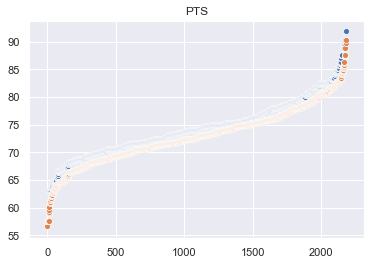

In [540]:
wins=df1[(df1['win']==1)]
losses=df1[(df1['win']==0)]

wins = wins.sort_values(by ='PTS' )
losses = losses.sort_values(by ='PTS' )

wins = wins.sort_values(by ='PTS')
wins = wins.sort_values(by ='PTS')

i=0
index_=[]
for thing in wins['PTS']:
    index_.append(i)
    i+=1
wins['index_']=index_

i=0
index_1=[]
for thing in losses['PTS']:
    index_1.append(i)
    i+=1
losses['index_']=index_1


ax = sns.scatterplot(list(wins['index_']),list(wins['PTS']))
ax = sns.scatterplot(list(losses['index_']),list(losses['PTS']))
ax.set_title('PTS')

In [535]:
wins=df1[(df1['win']==1)]
losses=df1[(df1['win']==0)]

wins = wins.sort_values(by ='PTS' )
losses = losses.sort_values(by ='PTS' )

wins = wins.sort_values(by ='PTS')
wins = wins.sort_values(by ='PTS')



In [536]:
i=0
index_=[]
for thing in wins['PTS']:
    index_.append(i)
    i+=1
wins['index_']=index_


In [537]:
i=0
index_1=[]
for thing in losses['PTS']:
    index_1.append(i)
    i+=1
losses['index_']=index_1

In [538]:
losses

,point_difference,team_seed,win,higher_or_lower_seed,BLKPG,STPG,APG,AST_TO,_3pm,_3pa,_2pm,_2pa,_2p_perc,PTS,FG_perc,_3p_perc,FT_perc,ORPG,DRPG,RPG,other_team_seed,round,PTS_opponent,BLKPG_opponent,STPG_opponent,APG_opponent,AST_TO_opponent,_3pm_opponent,_3pa_opponent,_2pm_opponent,_2pa_opponent,_2p_perc_opponent,FG_perc_opponent,_3p_perc_opponent,FT_perc_opponent,ORPG_opponent,DRPG_opponent,RPG_opponent,other_team_seed_opponent,BLKPG_subtracted,STPG_subtracted,APG_subtracted,AST_TO_subtracted,_3pm_subtracted,_3pa_subtracted,_2pm_subtracted,_2pa_subtracted,_2p_perc_subtracted,PTS_subtracted,FG_perc_subtracted,_3p_perc_subtracted,FT_perc_subtracted,ORPG_subtracted,DRPG_subtracted,RPG_subtracted,index_
893,11,14,0,0,2.58,7.12,11.3,0.90,7.1,23.0,341.0,805.0,0.424,56.8,0.376,0.310,0.634,7.9,24.7,32.6,3,1,68.7,3.07,7.04,13.1,0.98,7.4,23.0,469.0,952.0,0.493,0.426,0.324,0.691,9.4,23.3,32.7,14,-0.49,0.08,-1.8,-0.08,-0.3,0.0,-128.0,-147.0,-0.069,-11.9,-0.050,-0.014,-0.057,-1.5,1.4,-0.1,0
592,2,5,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,3,4,75.4,4.63,5.37,15.0,1.37,8.3,24.0,526.0,982.0,0.536,0.460,0.345,0.717,9.1,28.0,37.0,5,0.02,0.05,-3.4,-0.43,-2.5,-5.0,-131.0,-161.0,-0.055,-17.7,-0.046,-0.041,-0.006,-0.8,-2.1,-2.8,1
130,7,5,0,1,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,12,1,72.5,5.11,8.52,14.2,0.98,5.9,18.0,561.0,1125.0,0.499,0.446,0.325,0.643,11.5,26.0,37.4,5,-0.46,-3.10,-2.6,-0.04,-0.1,1.0,-166.0,-304.0,-0.018,-14.8,-0.032,-0.021,0.068,-3.2,-0.1,-3.2,2
712,5,7,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,2,2,74.0,4.41,7.30,14.2,1.23,8.4,25.0,453.0,890.0,0.509,0.435,0.337,0.743,10.2,25.3,35.5,7,0.24,-1.88,-2.6,-0.29,-2.6,-6.0,-58.0,-69.0,-0.028,-16.3,-0.021,-0.033,-0.032,-1.9,0.6,-1.3,3
858,3,7,0,1,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,10,1,80.6,2.13,5.83,17.6,1.61,10.6,25.0,580.0,1033.0,0.561,0.503,0.422,0.706,6.5,26.5,33.0,7,2.52,-0.41,-6.0,-0.67,-4.8,-6.0,-185.0,-212.0,-0.080,-22.9,-0.089,-0.118,0.005,1.8,-0.6,1.2,4
1246,5,7,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,2,2,78.1,3.85,6.67,15.6,1.37,7.3,20.0,537.0,1060.0,0.507,0.456,0.359,0.732,10.7,26.8,37.5,7,0.80,-1.25,-4.0,-0.43,-1.5,-1.0,-142.0,-239.0,-0.026,-20.4,-0.042,-0.055,-0.021,-2.4,-0.9,-3.3,5
1605,1,9,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,8,1,78.5,3.70,6.48,17.3,1.43,7.9,23.0,527.0,1019.0,0.517,0.455,0.351,0.741,11.4,26.0,37.5,9,0.95,-1.06,-5.7,-0.49,-2.1,-4.0,-132.0,-198.0,-0.036,-20.8,-0.041,-0.047,-0.030,-3.1,-0.1,-3.3,6
346,7,5,0,1,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,12,1,61.1,2.04,5.21,10.7,0.82,7.2,24.0,394.0,787.0,0.501,0.411,0.304,0.721,4.9,24.4,29.2,5,2.61,0.21,0.9,0.12,-1.4,-5.0,1.0,34.0,-0.020,-3.4,0.003,0.000,-0.010,3.4,1.5,5.0,7
1034,4,6,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,2,3,73.5,4.85,6.67,15.1,1.03,6.6,21.0,519.0,1000.0,0.519,0.446,0.317,0.676,11.1,27.2,38.3,6,-0.20,-1.25,-3.5,-0.09,-0.8,-2.0,-124.0,-179.0,-0.038,-15.8,-0.032,-0.013,0.035,-2.8,-1.3,-4.1,8
1318,2,4,0,0,4.65,5.42,11.6,0.94,5.8,19.0,395.0,821.0,0.481,57.7,0.414,0.304,0.711,8.3,25.9,34.2,2,4,74.0,3.67,8.37,11.7,0.98,7.1,22.0,487.0,953.0,0.511,0.437,0.320,0.727,7.6,24.2,31.8,4,0.98,-2.95,-0.1,-0.04,-1.3,-3.0,-92.0,-132.0,-0.030,-16.3,-0.023,-0.016,-0.016,0.7,1.7,2.4,9


# Insert rounds back in

In [76]:
def split_all_data_up (df,column):
    round_=[]
    i=0
    for thing in list(column):
        if i== 62:
            round_.append(6)
            round_.append(6)
            i=0
        elif 0<=i<=7 or 15<=i<=22 or 30<=i<=37 or 45<=i<=52:
            round_.append(1)
            round_.append(1)
            i+=1
        elif 8<=i<=11 or 23<=i<=26 or 38<=i<=41 or 53<=i<=56:
            round_.append(2)
            round_.append(2)
            i+=1
        elif 12<=i<=13 or 27<=i<=28 or 42<=i<=43 or 57<=i<=58:
            round_.append(3)
            round_.append(3)
            i+=1
        elif i==14 or i==29 or i==44 or i==59:
            round_.append(4)
            round_.append(4)
            i+=1
        elif i == 60 or i == 61:
            round_.append(5)
            round_.append(5)
            i+=1
    round_ = round_[0:4410]
    return round_

In [122]:
blah=split_all_data_up (df,df1['point_difference'])

In [123]:
len(blah)

4410

In [124]:
df1['round']=blah